<a href="https://colab.research.google.com/github/sumitgaurav25/python---practice/blob/main/08DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [10]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [14]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()

inputs.company = le_company.fit_transform(inputs.company)

le_job = LabelEncoder()

inputs.job = le_job.fit_transform(inputs.job)

le_degree = LabelEncoder()

inputs.degree = le_degree.fit_transform(inputs.degree)
inputs

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size=0.8)

In [27]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [28]:
X_test

,company,job,degree
10,1,2,0
4,2,1,0
15,1,1,1
12,1,0,0
7,0,1,0
8,0,0,0
6,0,2,1
1,2,2,1
5,2,1,1
13,1,0,1


In [29]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [30]:
model.score(X_test, Y_test)

0.5384615384615384

In [31]:
model.predict([[2, 0, 1]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
#confusion matrix

y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

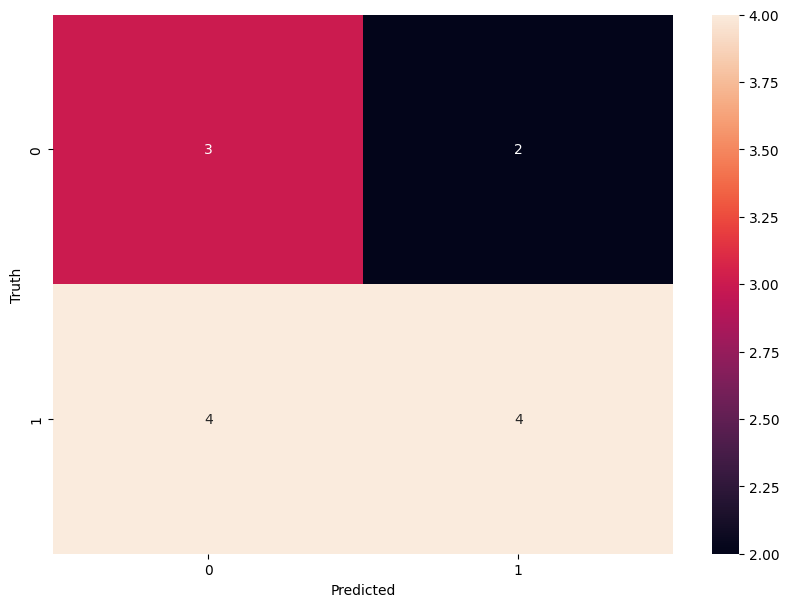

In [33]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')